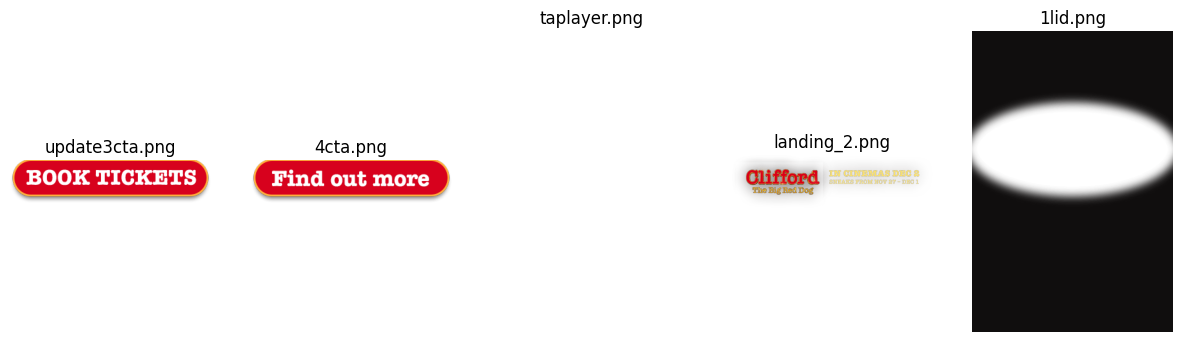

In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the Assets folder
assets_folder = '../data/Challenge_Data/Assets/'

# Function to load and display images
def load_and_display_images(folder_path, num_images=5):
    image_paths = []
    for subdir, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(os.path.join(subdir, file))
            if len(image_paths) >= num_images:
                break
        if len(image_paths) >= num_images:
            break
    
    plt.figure(figsize=(15, 10))
    for i, image_path in enumerate(image_paths):
        img = Image.open(image_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(os.path.basename(image_path))
        plt.axis('off')
    plt.show()

# Load and display sample images
load_and_display_images(assets_folder)


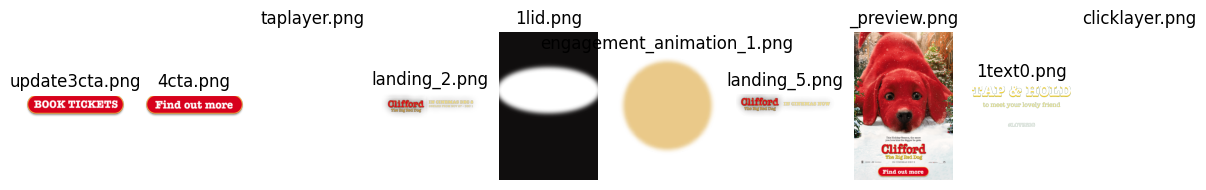

In [11]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the Assets folder
assets_folder = '../data/Challenge_Data/Assets/'

# Function to load and display images
def load_and_display_images(folder_path, num_images=10):
    image_paths = []
    for subdir, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(os.path.join(subdir, file))
            if len(image_paths) >= num_images:
                break
        if len(image_paths) >= num_images:
            break
    
    plt.figure(figsize=(15, 10))
    for i, image_path in enumerate(image_paths):
        img = Image.open(image_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(os.path.basename(image_path))
        plt.axis('off')
    plt.show()

# Load and display sample images
load_and_display_images(assets_folder)


In [12]:
import numpy as np

# Function to extract color histogram features from an image
def extract_color_histogram(image_path, bins=(8, 8, 8)):
    image = Image.open(image_path)
    image = image.resize((128, 128))  # Resize for consistency
    image_array = np.array(image)
    
    # Check if the image is grayscale
    if len(image_array.shape) == 2:
        image_array = np.stack((image_array,) * 3, axis=-1)  # Convert grayscale to RGB by duplicating channels
    
    hist = np.histogramdd(image_array.reshape(-1, 3), bins=bins, range=((0, 256), (0, 256), (0, 256)))
    hist = hist[0].flatten()  # Flatten the histogram
    return hist

In [15]:

# Extract features from sample images
def extract_features_from_images(folder_path, num_images=10):
    image_paths = []
    features = []
    for subdir, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(os.path.join(subdir, file))
            if len(image_paths) >= num_images:
                break
        if len(image_paths) >= num_images:
            break
    
    for image_path in image_paths:
        features.append(extract_color_histogram(image_path))
    
    return np.array(features)

In [16]:
# Extract features from sample images
features = extract_features_from_images(assets_folder)
print("Extracted Features Shape:", features.shape)


Extracted Features Shape: (10, 512)
